In [320]:
#imports necessarios
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [321]:
#leitura csv
file = "data.csv"
df = pd.read_csv(file, delimiter=";")
df = df.set_index("switch")
df

,S0,S1,S2,S3
switch,,,,
S0,NaN,[3][10],[2][1],[1][1]
S1,[2][10],NaN,[1][10],0
S2,[1][1],[4][10],NaN,0
S3,[4][1],0,0,NaN


In [322]:
#Lidando com NaN e "0"
df = df.replace(np.nan,0)
df = df.replace("0",0)
df

,S0,S1,S2,S3
switch,,,,
S0,0,[3][10],[2][1],[1][1]
S1,[2][10],0,[1][10],0
S2,[1][1],[4][10],0,0
S3,[4][1],0,0,0


In [323]:
#verifica conexão dos nós
df1 = df != 0
df1 = df1.reset_index()
df1 = df1.set_index("switch")
df1

,S0,S1,S2,S3
switch,,,,
S0,False,True,True,True
S1,True,False,True,False
S2,True,True,False,False
S3,True,False,False,False


In [324]:
#colunas: fonte e alvos
source = df1.iloc[:,1:].columns
targets = df1.iloc[:,1:].columns

In [325]:
source

Index(['S1', 'S2', 'S3'], dtype='object')

In [326]:
targets

Index(['S1', 'S2', 'S3'], dtype='object')

In [327]:
#populando os nós
G =nx.from_pandas_adjacency(df1, create_using = nx.Graph())
pos=nx.spring_layout(G) # positions for all nodes

In [328]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000


In [329]:
print("Grau de centralidade")
d = nx.degree_centrality(G)
size_node = [0]
for v in G.nodes():
    print(f"{v:2} {d[v]:.3f}")

Grau de centralidade
S0 1.000
S1 0.667
S2 0.667
S3 0.333


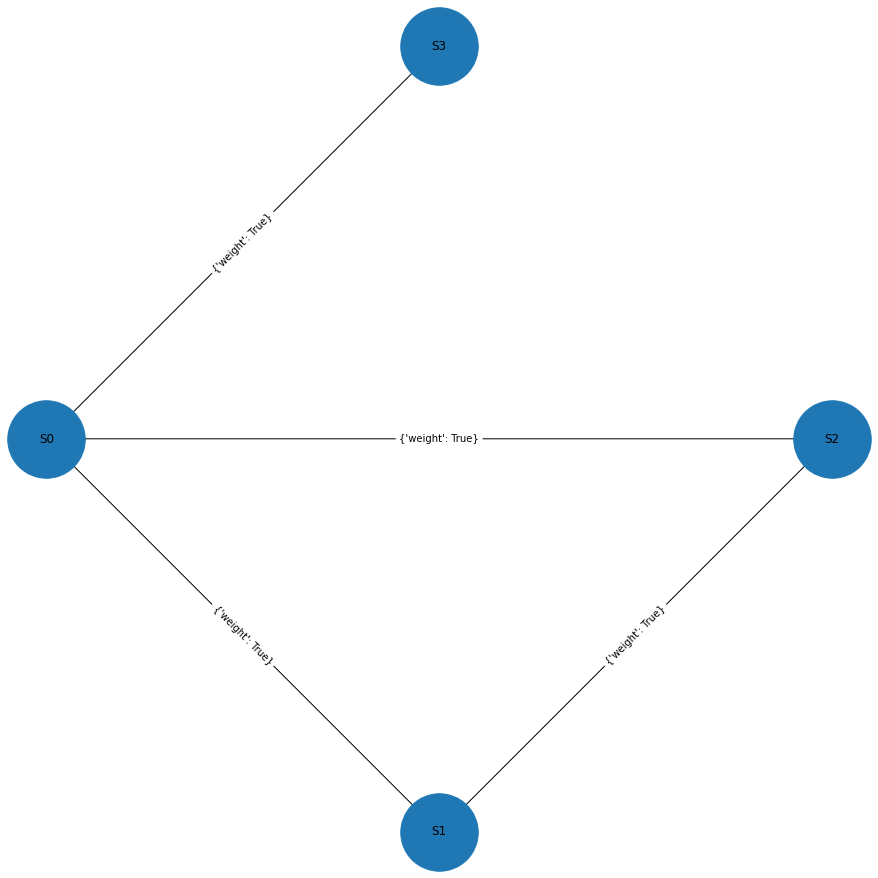

In [330]:
#grafo
figure(figsize=(12,12))
pos=nx.shell_layout(G)
nx.draw_shell(G, with_labels=True, node_size=6000, pos=pos)
nx.draw_networkx_labels(G,pos=pos)
nx.draw_networkx_edge_labels(G,pos=pos)
plt.show()

In [331]:
import matplotlib.pyplot as plt

plt.show()